In [3]:
from perceptron import Perceptron


## Ensure we can get straight line

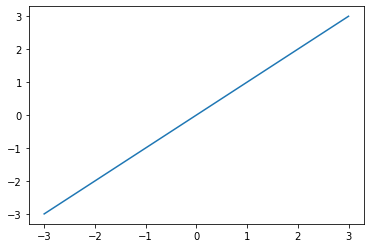

In [4]:
p = Perceptron([-1, 1], 0)
p.plot(start=-3, stop=3)


In [5]:
import numpy as np
from perceptron import plot_points


In [6]:
features = np.array([[1, 0], [0, 2], [1, 1], [1, 2],
                    [1, 3], [2, 2], [2, 3], [3, 2]])
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])
p = Perceptron([1, 1], 0)


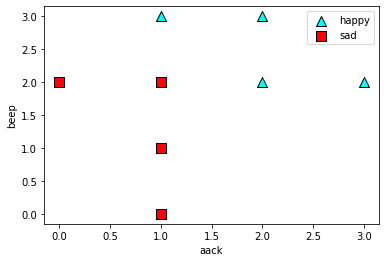

In [7]:
plot_points(features, labels)


In [8]:
p2 = Perceptron([1, 2], -4)
p2.perceptron_trick(features[6], 0, learning_rate=0.01)
p2.__str__()

'([0.98 1.97], -4.01)'

## Training

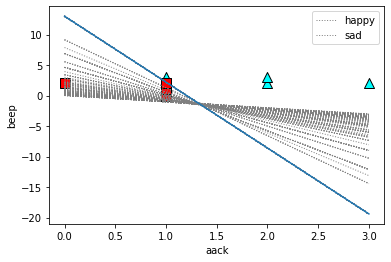

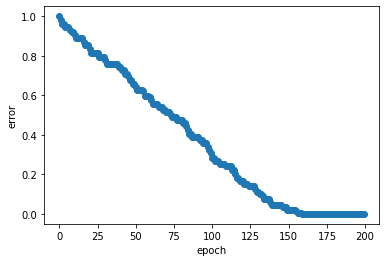

In [9]:
p.clone().train(features, labels, epochs=200)

## Using turicreate

In [10]:
import turicreate as tc

In [12]:
datadict = {'aack': features[:,0], 'beep':features[:,1], 'prediction': labels}
data = tc.SFrame(datadict)
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


In [13]:
perceptron = tc.logistic_classifier.create(data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.000843     | 1.000000          |

| 2         | 3        | 1.001634     | 1.000000          |

| 3         | 4        | 1.002334     | 1.000000          |

| 4         | 5        | 1.003046     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [14]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502
